<a href="https://colab.research.google.com/github/bkneussl/SE-Digital-Organizations/blob/main/questions_chapter2_student.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Framing the Problem
Your task is to build a machine learning model that predicts house prices in King County, an area in the US state of Washington, as described in Chapter 2 of the book *Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow*. Please read chapter 2 carefully in parallel. Your model should learn from the given data and be able to predict new home prices using the given metrics. Let's take a look at our given dataset:

The following code imports some packages, mounts the Google Drive folder and loads the data. Run the code and adapt the file paths!

In [3]:
import pandas as pd
from google.colab import drive
from google.colab import data_table
import matplotlib.pyplot as plt
data_table.enable_dataframe_formatter()

drive.mount('/content/drive')
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Chapter 2/kc_house_data.csv")

data.head(10)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long
0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257
1,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319
2,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233
3,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393
4,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045
5,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,3,11,3890,1530,2001,0,98053,47.6561,-122.005
6,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,3,7,1715,0,1995,0,98003,47.3097,-122.327
7,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,3,7,1060,0,1963,0,98198,47.4095,-122.315
8,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,3,7,1050,730,1960,0,98146,47.5123,-122.337
9,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,3,7,1890,0,2003,0,98038,47.3684,-122.031


Description of the dataset
* id: a notation for a house
* date: Date house was sold
* price: Price is prediction target
* bedrooms: Number of Bedrooms/House
* bathrooms: Number of bathrooms/bedrooms
* sqft_living: square footage of the home 
* sqft_lot: square footage of the lot 
* floors: Total floors (levels) in house 
* waterfront: House which has a view to a waterfront
* view: Has been viewed
* condition: How good the condition is Overall 
* grade: overall grade given to the housing unit, based on King County grading system 
* sqft_above: square footage of house apart from basement 
* sqft_basement: square footage of the basement 
* yr_built: Built Year 
* yr_renovated: Year when house was renovated 
* zipcode: zip code 
* lat: Latitude coordinate 
* long: Longitude coordinate

See chapters 1 & 2 for all questions below!

What is a machine learning pipeline? Please make a fictitious example that is appropriate for our data set.

Is our task a a supervised, unsupervised, semi-supervised, self-supervised, or reinforcement learning task? Is it a classification or regression task? Do we use batch or online learning?

What is a performance measure? Give two typical examples of performance measures in regression models. How can these be interpreted in a linear regression?


##Take a Quick Look at the Data Structure

Try to use the functions *head()*, *describe()* and *info()* to get further informations of the dataset. Additional use *value_counts()* to get all possible values of one variable. For all variables, consider whether they are categorical, ordinal, or numeric! Do you notice anything about the variable waterfront when you compare it with the variable renovated?

In [ ]:
# YOUR TASK

0    21450
1      163
Name: waterfront, dtype: int64

Try to visualize the distributions of all the variables. (Use the *hist()* function from *matplotlib*.) Are some distributions skewed? What is right-skewed or left-skewed? Do the scales of the different variables differ? What do you notice with the variable *yr_renovated*?

In [ ]:
# YOUR TASK

Unrenovated houses have the entry 0. With which variable could we replace the entry 0?

Your task is to clean the dataset: 

1. Divide the variable *yr_renovated* into two variables.
2. Create a binary variable that indicates whether the house has been renovated or not. (0 = no renovation, 1 = renovated) You can use the *cut()* function.
3. Additionally overwrite the variable *yr_renovated* with the maximum of yr_renovated and yr_built, you can use the max() function.
4. Change the *date* column to *datetime* with the function *to_datetime()*.

In [ ]:
# Some Data Cleaning
data['date'] = # YOUR TASK
data['renovated'] = # YOUR TASK
data['yr_renovated'] = # YOUR TASK

##Create a Test Set

Try to explain what a *stratified sampling* is. Try to create a stratified train and test set, which should be named *train_set* and *test_set*. Create an extra column for this, which divides the house prices from the dataset into different categories. At the end, overwrite your dataset with the training dataset with *data = train_set.copy()*.

In [ ]:
from sklearn.model_selection import train_test_split

train_set, test_set = # YOUR TASK

train_set = # YOUR TASK
test_set = # YOUR TASK

In [ ]:
data = train_set.copy()
data.head(50)

##Explore and Visualize the Data to Gain Insights

First, try to visualize the geographic dates (*lat*, *long*) from our dataset in a scatter plot. Where are the expensive houses located? For example, you can use a logarithmic color bar to see where it is cheaper and more expensive. Consider how to combine the 'lat' and 'long' features into a simpler feature. (No implementation, but a consideration is sufficient).

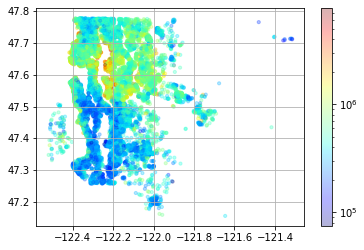

In [ ]:
# YOUR TASK

### Correlations

Since the dataset does not have so many features, it is quite easy to calculate the correlations of these. Please calculate all meaningful standard correlation effects with the function *corr()*. How can the values of this correlation effect be interpreted? What are probably the best variables to predict? For which variables does the Pearson coefficient make sense and for which not?

In [ ]:
# YOUR TASK

Additionally, create a scatter plot for the most important features using the Pandas scatter_matrix() function. What do you notice about the variables sqft_living, sqft_above and sqft_basement? 

In [ ]:
#YOUR TASK

## Experiment with Attribute Combinations

Try to combine the columns bedrooms, sqft_living by calculating the bedroom density, i.e. *bedrooms/sqft_living*. Check the new Pearson Correlation coefficients.


In [ ]:
#YOUR TASK

##Prepare the Data for Machine Learning Algorithms

In the first step, we separate our trainings dataset with our labeled dataset.

In [ ]:
data = train_set.drop("price", axis=1)
data_label = train_set[["price"]].copy()

###Missing Data

What options do we have to deal with missing values? What options do we have to deal with missing values? Write a code that give all lines, which have any missing value. What is the function *SimpleImputer(strategy="median")* doing?

In [ ]:
#YOUR TASK: Write a code that give all lines, which have any missing value. 

Empty DataFrame
Columns: [date, bedrooms, bathrooms, sqft_living, sqft_lot, floors, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_built, yr_renovated, zipcode, lat, long, renovated]
Index: []


###Handling Text and Categorical Attributes


What are ordinal and categorical data? Do we have such data in our data set? What possibilities do we have to transform this data correctly? What are dummy attributes? Try to understand what the function *OneHotEncoder()* does with the variable waterfront.

In [ ]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

waterfront_encoded = #YOUR TASK

##Feature Scaling and Transformation

What is min-max scaling and standardization of features? What is a heavy tail in a distribution? What problem do we have with min-max scaling and standardization on a heavy-tailed distribution? Can you make an example?

In [ ]:
data.columns

Index(['date', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'renovated'],
      dtype='object')

Try to brainstorm which variable conversion makes sense for which variable! Write down your guess! Try to understand the following two code blocks, how are the variables *long* and *lat* converted?

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)
    
    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]


In [ ]:
cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)
similarities = cluster_simil.fit_transform(data[["lat", "long"]],
                                           sample_weight=data_label["price"])

data_renamed = data.rename(columns={
    "lat": "Latitude", "long": "Longitude"})

data_renamed["Max cluster similarity"] = similarities.max(axis=1)

data_renamed.plot(kind="scatter", x="Longitude", y="Latitude", grid=True,
                     c="Max cluster similarity",
                     cmap="jet", colorbar=True,
                     legend=True, sharex=False, figsize=(10, 7))
plt.plot(cluster_simil.kmeans_.cluster_centers_[:, 1],
         cluster_simil.kmeans_.cluster_centers_[:, 0],
         linestyle="", color="black", marker="X", markersize=20,
         label="Cluster centers")
plt.legend(loc="upper right")

plt.show()

Have a look at my suggestion of variable conversion. I ask you to understand the code in detail, what variable transformations have I made? What arguments are in favor, and what arguments might be against? How would you convert the variables if you compare it with your guess?

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.preprocessing import OneHotEncoder

def time(X):
 a =  pd.to_datetime("now") - X[X.columns[0]]
 a = a.dt.total_seconds()
 return a.to_frame()

date_pipeline = make_pipeline(
 FunctionTransformer(time),
 StandardScaler())

cluster_simil = ClusterSimilarity(n_clusters=15, gamma=100., random_state=42)

default_num_pipeline = make_pipeline(StandardScaler())

log_pipeline = make_pipeline(
 FunctionTransformer(np.log),
 StandardScaler())

label_pipeline = make_pipeline(
 FunctionTransformer(np.log)) 

cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown="ignore"))

preprocessing = ColumnTransformer([
 ("log", log_pipeline, ["sqft_living", "sqft_lot", "sqft_above"]),
 ("geo", cluster_simil, ["lat", "long"]),
 ("cat", cat_pipeline, ["waterfront", "renovated"]),
 ("date", date_pipeline, ["date"]),
 ("normal", default_num_pipeline, ["yr_built", "yr_renovated", "bedrooms", "bathrooms", "floors", "view", "condition", "grade"])
 ])

preprocessing_label = ColumnTransformer([
 ("log", label_pipeline, ["price"])
 ])

How many features do we have for predicition?

In [ ]:
data_prepared = preprocessing.fit_transform(data)
data_prepared.shape

##Select and Train a Model

###Linear Model

The following code determines a linear regression model, again try to explain what the code computes!

In [ ]:
from sklearn.linear_model import LinearRegression

data_label_transformed = preprocessing_label.fit_transform(data_label)

lin_reg = make_pipeline(preprocessing, LinearRegression())
lin_reg.fit(data, data_label_transformed)

data_predictions = lin_reg.predict(data)

Your task is to determine the median of the absolute error [Median(ABS(a-b))] (In addition, you can also get the percentage error by dividing by the actual sales value before taking the median.) and the Root Mean Square Error (RMSE)! Remember that estimates are logarithmic. Also calculate the median of all home prices. And try to evaluate all error values. How good is the model?

In [ ]:
# Your task

###Random Forest Regressor

We will now also compute a Radom Forrest model, automatically determining a cross validation with n = 10 on the training dataset. What happens during the cross validation? Why have I adjusted the R squared error with a separate function? What is the function *np.ravel* doing?

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import make_scorer

data_label_transformed = preprocessing_label.fit_transform(data_label)

forest_reg = make_pipeline(preprocessing, RandomForestRegressor(random_state=42))
forest_reg.fit(data, np.ravel(data_label_transformed))

def adjusted_rsquare(y_true, y_pred, **kwargs):
  return -np.sqrt(np.mean((np.exp(y_true)-np.exp(y_pred))**2))

neg_exp_root_mean_squared_error = make_scorer(adjusted_rsquare, greater_is_better=False)

forest_rmses = -cross_val_score(forest_reg, data, np.ravel(data_label_transformed),
 scoring=neg_exp_root_mean_squared_error, cv=10)



The following code outputs the RMSE for all 10 folds, compare it to the linear regression.

In [ ]:
pd.Series(forest_rmses).describe()

##Fine-Tune Your Model

###Grid Search & Randomized Search
Try to explain what the Grid Search and Random Search methods do. What are the advantages of each method. For which parameters would this make sense in our example?

###Evaluate Your System on the Test Set

Try to evaluate the final model with the test set. Compute the Median and 95% confidence interval of the root mean squared error and the median of the absolute error.

Remember to invert your results with the inverse functions you applied to the label variable as a preprocessing step. (The logarithm is the inverse function of the exponential function).

In [ ]:
# Your TASK

##Launch, Monitor, and Maintain Your System

What package and code can we use to save and reload our model?

Why is it possible that we need a monitoring code?

Try to save our learned model so that we can reload it at any time.

In [ ]:
# Your task

##Ideas for the Learning Portfolio

1) Adding a further model: In a few weeks we will learn neural networks, try to add this model!

2) Find a challenge on Kaggle for a regression dataset and use Chapter 2 and this colab to try to solve it. 